In [1]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

In [2]:
# create data class

class Data(Dataset):
    
    def __init__(self, train=True):
        if train == True:
            self.x = torch.arange(-3,3,0.1).view(-1,1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [3]:
train_data = Data()

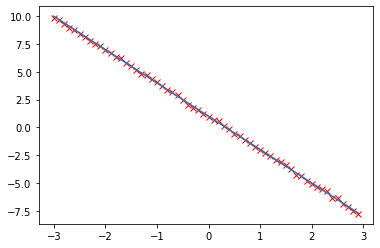

In [4]:
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr')
plt.plot(train_data.x.numpy(), train_data.f.numpy())
plt.show()

In [5]:
# create linear regression model class

class linear_regression(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [6]:
model = linear_regression(1,1)

In [7]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size=1)

In [8]:
checkpoint_path = 'checkpoint_model.pt'

In [9]:
checkpoint = {'epoch': None, 'model_state_dict': None, 'optimizer_state_dict': None, 'loss': None}

In [11]:
epochs = 4
LOSS_TRAIN = []

for epoch in range(epochs):
    for x,y in trainloader:
        yhat = model(x)
        loss = criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train = criterion(model(train_data.x), train_data.y).item()
        
        LOSS_TRAIN.append(loss_train)
        
    checkpoint['epoch'] = epoch
    checkpoint['model_state_dict'] = model.state_dict()
    checkpoint['optimizer_state_dict'] = optimizer.state_dict()
    checkpoint['loss'] = loss
    torch.save(checkpoint, checkpoint_path)

In [12]:
checkpoint = torch.load(checkpoint_path)
checkpoint

{'epoch': 3,
 'model_state_dict': OrderedDict([('linear.weight', tensor([[-3.0072]])),
              ('linear.bias', tensor([0.9848]))]),
 'optimizer_state_dict': {'state': {},
  'param_groups': [{'lr': 0.01,
    'momentum': 0,
    'dampening': 0,
    'weight_decay': 0,
    'nesterov': False,
    'params': [2164538341400, 2164538341000]}]},
 'loss': tensor(0.0034, requires_grad=True)}

In [15]:
model_checkpoint = linear_regression(1,1)
model_checkpoint.state_dict()

OrderedDict([('linear.weight', tensor([[0.3215]])),
             ('linear.bias', tensor([-0.7499]))])

In [16]:
model_checkpoint.load_state_dict(checkpoint['model_state_dict'])
model_checkpoint.state_dict()

OrderedDict([('linear.weight', tensor([[-3.0072]])),
             ('linear.bias', tensor([0.9848]))])

In [17]:
optimizer = optim.SGD(model_checkpoint.parameters(), lr=1)
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [2164538448376, 2164538446536]}]}

In [18]:
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'params': [2164538448376, 2164538446536]}]}

In [19]:
loss = checkpoint['loss']
print('loss', loss)

loss tensor(0.0034, requires_grad=True)


In [20]:
# we continue training the model

for epoch in range(checkpoint['epoch'], epochs):
    for x,y in trainloader:
        yhat = model_checkpoint(x)
        loss = criterion(yhat,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train = criterion(model_checkpoint(train_data.x), train_data.y).item()
        
        LOSS_TRAIN.append(loss_train)

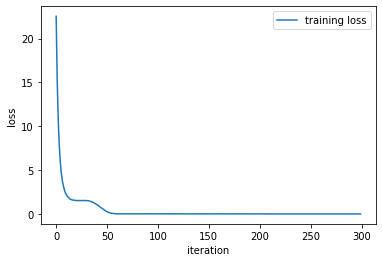

In [21]:
# plot the loss

plt.plot(LOSS_TRAIN, label = 'training loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.show()